In [1]:
import ssms
from matplotlib import pyplot as plt
from ssms.basic_simulators.simulator import simulator
import numpy as np

In [2]:
np.unique(out["metadata"]["t"]).shape

NameError: name 'out' is not defined

In [4]:
simulations = simulator(
    model="angle_deadline",
    theta={
        "a": np.ones(10000) * 1.0,
        "z": np.ones(10000) * 0.5,
        "t": np.ones(10000) * 0.5,
        "v": np.ones(10000) * 1.0,
        "theta": np.ones(10000) * 0.5,
        "deadline": np.ones(10000) * 5.0,
    },
    n_samples=1,
    max_t=20,
)

In [5]:
simulations

{'rts': array([[1.4772485 ],
        [0.6739382 ],
        [0.7260139 ],
        ...,
        [0.69780004],
        [0.90793693],
        [0.86936617]], dtype=float32),
 'choices': array([[ 1],
        [ 1],
        [-1],
        ...,
        [ 1],
        [ 1],
        [-1]], dtype=int32),
 'metadata': {'v': array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
  'a': array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
  'z': array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32),
  't': array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32),
  's': 1.0,
  'deadline': array([5., 5., 5., ..., 5., 5., 5.], dtype=float32),
  'theta': array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32),
  'delta_t': 0.0010000000474974513,
  'max_t': 20.0,
  'n_samples': 1,
  'n_trials': 10000,
  'simulator': 'ddm_flexbound',
  'boundary_fun_type': 'angle',
  'possible_choices': [-1, 1],
  'trajectory': array([[ 0.0000000e+00],
         [ 3.4604587e-02],
         [ 9.1727227e-02],
         ...,

In [ ]:
'ddm_boundaryfun_driftfun_deadline'

In [7]:
simulations

{'rts': array([[1.2078639 ],
        [1.0145779 ],
        [0.824644  ],
        ...,
        [0.87732315],
        [1.1183238 ],
        [1.1726061 ]], dtype=float32),
 'choices': array([[ 1],
        [ 1],
        [ 1],
        ...,
        [ 1],
        [-1],
        [ 1]], dtype=int32),
 'metadata': {'v': array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
  'a': array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
  'z': array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32),
  't': array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32),
  's': 1.0,
  'deadline': array([999., 999., 999., ..., 999., 999., 999.], dtype=float32),
  'theta': array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32),
  'delta_t': 0.0010000000474974513,
  'max_t': 20.0,
  'n_samples': 1,
  'n_trials': 10000,
  'simulator': 'ddm_flexbound',
  'boundary_fun_type': 'angle',
  'possible_choices': [-1, 1],
  'trajectory': array([[ 0.0000000e+00],
         [ 4.4858374e-02],
         [-3.6620833e-03],
 

In [4]:
out_dict = {}
out_dict['choice_p'] = {}
out_dict['choice_p_no_omission'] = {}
out_dict['p_omission'] = {}
for choice in simulations['metadata']['possible_choices']:
    out_dict['choice_p'][choice] = np.array([(simulations["choices"] == choice).sum() / simulations["choices"].flatten().shape[0]])
    out_dict['choice_p_no_omission'][choice] = np.array([(simulations["choices"][simulations['rts'] != -999] == choice).sum() / simulations["choices"].flatten().shape[0]])
    out_dict['p_omission'][choice] = np.array([(simulations["rts"] == -999).sum() / simulations["choices"].flatten().shape[0]])

In [11]:
simulations['rts'] != -999

NameError: name 'simulations' is not defined

In [5]:
out_dict

{'choice_p': {-1: array([0.2386]), 1: array([0.7614])},
 'choice_p_no_omission': {-1: array([0.0895]), 1: array([0.4996])},
 'p_omission': {-1: array([0.4109]), 1: array([0.4109])}}

In [6]:
out['metadata']

{'v': array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 'a': array([1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5], dtype=float32),
 'z': array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32),
 't': array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], dtype=float32),
 's': 1.0,
 'deadline': array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 'delta_t': 0.0010000000474974513,
 'max_t': 20.0,
 'n_samples': 1,
 'n_trials': 10000,
 'simulator': 'ddm_flexbound',
 'boundary_fun_type': 'angle',
 'possible_choices': [-1, 1],
 'trajectory': array([[ 0.000000e+00],
        [-2.215560e-02],
        [-4.701581e-03],
        ...,
        [-9.990000e+02],
        [-9.990000e+02],
        [-9.990000e+02]], dtype=float32),
 'boundary': array([  1.5      ,   1.4984426,   1.4968852, ..., -29.645042 ,
        -29.646599 , -29.648155 ], dtype=float32),
 'model': 'angle'}

In [24]:
from copy import deepcopy
v = 1.0
a = 2.0
z = 0.5
t = 0.0
theta = 0.7
deadline = 10
out = simulator(model="angle_deadline", theta=[v, a, z, t, theta, deadline], n_samples=10000, max_t=20)
out_log = deepcopy(out) 
out_log["log_rts"] = np.ones(out["rts"].shape) * -999
out_log["log_rts"][out_log['rts'] != -999] = np.log(out_log["rts"][out_log['rts'] != -999])
del out_log['rts']

/Users/afengler/Library/CloudStorage/OneDrive-Personal/proj_ssm_simulators/ssm-simulators/ssms/basic_simulators/simulator.py:377: UserWarning: Deadline model request, and theta not supplied as dict.Make sure to supply the deadline parameters in last position!
  warnings.warn(


(array([0.00312946, 0.00521577, 0.00834523, 0.02190623, 0.02920831,
        0.03442408, 0.040683  , 0.06363239, 0.07510708, 0.07197762,
        0.08032285, 0.07510708, 0.08866808, 0.067805  , 0.08449547,
        0.07093446, 0.05111454, 0.05215769, 0.04902823, 0.02399254,
        0.01147469, 0.00625892, 0.00312946, 0.        , 0.        ,
        0.        , 0.00312946, 0.03442408, 0.22010547, 0.49654125,
        0.71247411, 0.87520611, 0.93153642, 0.90545758, 0.91797542,
        0.83660942, 0.70830149, 0.58103672, 0.50071387, 0.44438356,
        0.36719017, 0.27643578, 0.21906232, 0.14499839, 0.11579008,
        0.06676185, 0.03129462, 0.01043154, 0.00938839, 0.00417262]),
 array([-2.40115374, -2.30529061, -2.20942747, -2.11356434, -2.01770121,
        -1.92183808, -1.82597494, -1.73011181, -1.63424868, -1.53838554,
        -1.44252241, -1.34665928, -1.25079614, -1.15493301, -1.05906988,
        -0.96320675, -0.86734361, -0.77148048, -0.67561735, -0.57975421,
        -0.48389108, -0.38

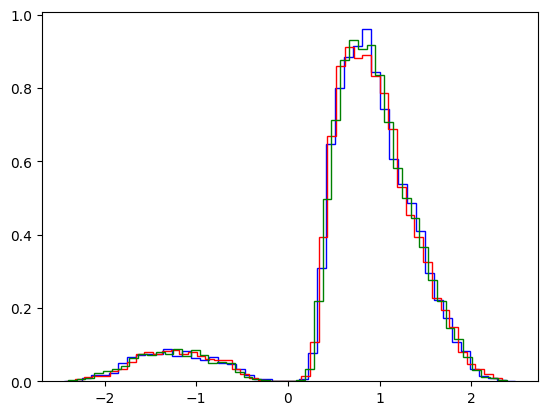

In [31]:
my_kde = ssms.support_utils.kde_class.LogKDE(out)
my_kde_shifted_log = ssms.support_utils.kde_class.LogKDEshifted(out_log)
my_kde_shifted = ssms.support_utils.kde_class.LogKDEshifted(out)

sample_kde = my_kde.kde_sample(10000)
sample_kde_shifted = my_kde_shifted.kde_sample(10000)
sample_kde_shifted_log = my_kde_shifted_log.kde_sample(10000)
plt.hist(sample_kde[0] * sample_kde[1], bins = 50, density=True, histtype='step', color='blue')
plt.hist(sample_kde_shifted['rts'] * sample_kde_shifted['choices'], bins = 50, density=True, histtype='step', color='red')
plt.hist(sample_kde_shifted_log['rts'] * sample_kde_shifted_log['choices'], bins = 50, density=True, histtype='step', color='green')

In [27]:
sample_kde

(array([[0.42254475],
        [0.4172195 ],
        [1.44519658],
        ...,
        [0.57311077],
        [1.08196257],
        [0.70934649]]),
 array([[-1.],
        [-1.],
        [-1.],
        ...,
        [ 1.],
        [ 1.],
        [ 1.]]),
 {'v': array([1.], dtype=float32),
  'a': array([2.], dtype=float32),
  'z': array([0.5], dtype=float32),
  't': array([0.], dtype=float32),
  's': 1.0,
  'deadline': array([10.], dtype=float32),
  'theta': array([0.7], dtype=float32),
  'delta_t': 0.0010000000474974513,
  'max_t': 20.0,
  'n_samples': 10000,
  'n_trials': 1,
  'simulator': 'ddm_flexbound',
  'boundary_fun_type': 'angle',
  'possible_choices': [-1, 1],
  'trajectory': array([[ 0.0000000e+00],
         [-1.9366566e-02],
         [ 3.6493689e-04],
         ...,
         [-9.9900000e+02],
         [-9.9900000e+02],
         [-9.9900000e+02]], dtype=float32),
  'boundary': array([  2.       ,   1.9991577,   1.9983155, ..., -14.844082 ,
         -14.844925 , -14.845766 ], dtyp

In [ ]:
from matplotlib import pyplot as plt

plt.plot(data_1[0], np.exp(evals_1), color="blue")
plt.plot(data_m1[0] * (-1), np.exp(evals_m1), color="blue")
plt.plot(data_1_shifted[0], np.exp(evals_1_shifted), color="red")
plt.plot(data_m1_shifted[0] * (-1), np.exp(evals_m1_shifted), color="red")

plt.hist(out["rts"][out["rts"] != -999] * out["choices"][out["rts"] != -999], bins=40, histtype="step", density=True)

In [8]:
my_kde = ssms.support_utils.kde_class.LogKDE(out)

In [19]:
my_kde.kde_eval((data_1['rts'], data_1['choices']))
my_kde.kde_sample(n_samples = 10000)

(10000, 1)

In [23]:
my_kde_shifted.kde_sample(n_samples=10000)['rts'].shape

(10000, 1)

In [21]:
my_kde_shifted_log = ssms.support_utils.kde_class.LogKDEshifted(out_log)
my_kde_shifted = ssms.support_utils.kde_class.LogKDEshifted(out)

In [13]:
data_1 = {'rts': np.linspace(0.01, 10, 1000),
          'choices': np.ones(1000)}
data_m1 = {'rts': np.linspace(0.01, 10, 1000), 
          'choices': (-1) * np.ones(1000)}

data_l1 = {'log_rts': np.log(np.linspace(0.01, 10, 1000)),
          'choices': np.ones(1000)}
data_lm1 = {'log_rts': np.log(np.linspace(0.01, 10, 1000)),
          'choices': (-1) * np.ones(1000)}

# data_m1 = (np.linspace(0.01, 10, 1000), np.ones(1000) * (-1))

# data_1_shifted = (np.linspace(0.01, 10, 1000), np.ones(1000))
# data_m1_shifted = (np.linspace(0.01, 10, 1000), np.ones(1000) * (-1))

# data_l1 = np.log(data_1)

In [14]:
evals_1 = my_kde_shifted.kde_eval(data_1)
evals_m1 = my_kde_shifted.kde_eval(data_m1)

evals_l1 = my_kde_shifted.kde_eval(data_1)
print('this is the problem')
evals_lm1 = my_kde_shifted.kde_eval(data_lm1)

# evals_1_shifted = my_kde_shifted.kde_eval(data_1_shifted)
# evals_m1_shifted = my_kde_shifted.kde_eval(data_m1_shifted)

NameError: name 'my_kde_shifted' is not defined

first
(1000,)
second
(1000,)
first
(1000,)
second
(1000,)


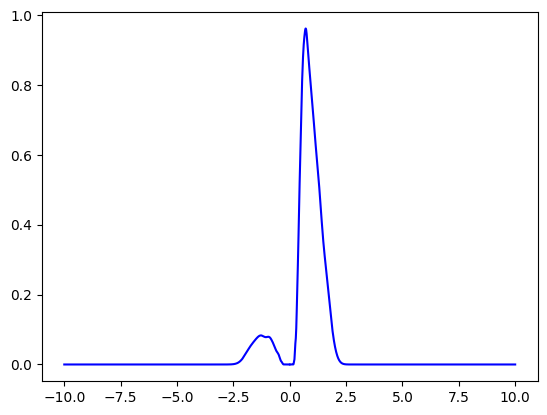

In [31]:
# my_kde_shifted.kde_eval(data_1)
# my_kde_log_shifted.kde_eval(data_1)
from matplotlib import pyplot as plt
plt.plot(data_1['rts'], np.exp(my_kde_shifted.kde_eval(data_1)), color="blue", label='')
plt.plot(data_m1['rts'] * (-1), np.exp(my_kde_shifted.kde_eval(data_m1)), color="blue", label='')

pre
(1000, 1)
first
(1000,)
second
(1000,)
pre
(1000, 1)
first
(1000,)
second
(1000,)


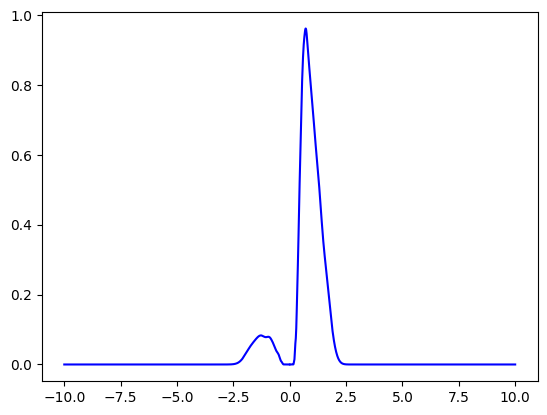

In [32]:
plt.plot(np.exp(data_l1['log_rts']), np.exp(np.squeeze(my_kde_shifted.kde_eval(data_l1)) - np.log(np.exp(data_lm1['log_rts']) - t)), color="blue", label='')
plt.plot(np.exp(data_lm1['log_rts']) * (-1), np.exp(np.squeeze(my_kde_shifted.kde_eval(data_lm1)) - np.log(np.exp(data_lm1['log_rts']) - t)), color="blue", label='')

In [23]:
np.squeeze(np.exp(my_kde_shifted.kde_eval(data_l1))).shape

pre
(1000, 1)
first
(1000,)
second
(1000,)


(1000,)

In [19]:
my_kde_shifted.kde_eval(data_l1).shape

pre
(1000, 1)
first
(1000,)
second
(1000,)


(1000, 1)

In [23]:
np.log(np.exp(data_lm1['log_rts']) - t)

/var/folders/gx/s43vynx550qbypcxm83fv56dzq4hgg/T/ipykernel_2400/1136789726.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(np.exp(data_lm1['log_rts']) - t)
/var/folders/gx/s43vynx550qbypcxm83fv56dzq4hgg/T/ipykernel_2400/1136789726.py:1: RuntimeWarning: invalid value encountered in log
  np.log(np.exp(data_lm1['log_rts']) - t)


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [25]:
np.exp(data_lm1['log_rts'])

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,
        1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,  1.06,  1.07,  1.08,
        1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,  1.15,  1.16,  1.17,
        1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,  1.24,  1.25,  1.26,
        1.27,  1.28,

In [ ]:
data_l1 = np.log(data_1)


In [7]:
evals_1 = my_kde_shifted.kde_eval(data_1)
evals_m1 = my_kde_shifted.kde_eval(data_m1)

evals_1_shifted = my_kde_shifted.kde_eval(data_1_shifted)
evals_m1_shifted = my_kde_shifted.kde_eval(data_m1_shifted)

evals_1

AttributeError: 'tuple' object has no attribute 'keys'

(array([2.79595485e-01, 9.97337554e-02, 9.20619281e-02, 9.46192038e-02,
        7.84231239e-02, 4.77358145e-02, 3.15397346e-02, 3.23921599e-02,
        1.53436547e-02, 5.96697682e-03, 8.52425260e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.36388042e-02, 2.05434488e-01, 5.48961867e-01,
        8.15770974e-01, 1.01012393e+00, 1.00756666e+00, 8.80555293e-01,
        7.97017618e-01, 6.64891703e-01, 4.92701800e-01, 7.85083664e-01]),
 array([-2.49999499e+00, -2.37499517e+00, -2.24999534e+00, -2.12499551e+00,
        -1.99999568e+00, -1.87499586e+00, -1.74999603e+00, -1.62499620e+00,
        -1.49999638e+00, -1.37499655e+00, -1.24999672e+00, -1.12499689e+00,
        -9.99997067e-01, -8.74997240e-01, -7.49997

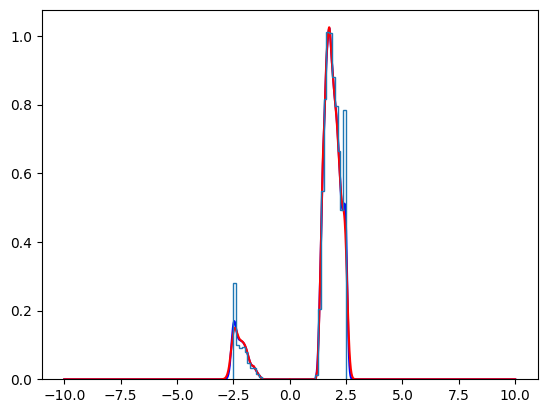

In [61]:
from matplotlib import pyplot as plt

plt.plot(data_1[0], np.exp(evals_1), color="blue")
plt.plot(data_m1[0] * (-1), np.exp(evals_m1), color="blue")
plt.plot(data_1_shifted[0], np.exp(evals_1_shifted), color="red")
plt.plot(data_m1_shifted[0] * (-1), np.exp(evals_m1_shifted), color="red")

plt.hist(out["rts"][out["rts"] != -999] * out["choices"][out["rts"] != -999], bins=40, histtype="step", density=True)

In [15]:
out_kde_shifted = my_kde_shifted.kde_sample(n_samples = 10000)
out_kde = my_kde.kde_sample(n_samples = 10000)

NameError: name 'my_kde_shifted' is not defined

In [52]:
out_kde[1]

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]])

(array([2.79595485e-01, 9.97337554e-02, 9.20619281e-02, 9.46192038e-02,
        7.84231239e-02, 4.77358145e-02, 3.15397346e-02, 3.23921599e-02,
        1.53436547e-02, 5.96697682e-03, 8.52425260e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.36388042e-02, 2.05434488e-01, 5.48961867e-01,
        8.15770974e-01, 1.01012393e+00, 1.00756666e+00, 8.80555293e-01,
        7.97017618e-01, 6.64891703e-01, 4.92701800e-01, 7.85083664e-01]),
 array([-2.49999499e+00, -2.37499517e+00, -2.24999534e+00, -2.12499551e+00,
        -1.99999568e+00, -1.87499586e+00, -1.74999603e+00, -1.62499620e+00,
        -1.49999638e+00, -1.37499655e+00, -1.24999672e+00, -1.12499689e+00,
        -9.99997067e-01, -8.74997240e-01, -7.49997

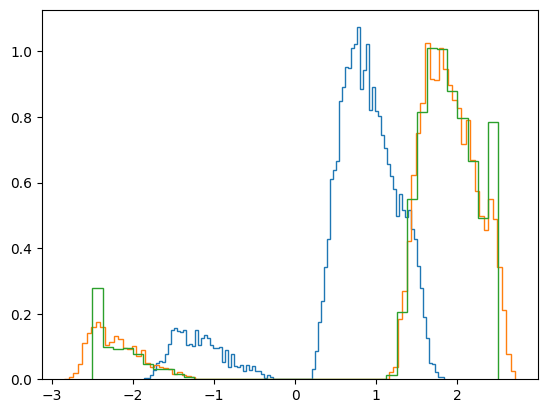

In [66]:
from matplotlib import pyplot as plt

# plt.plot(data_1[0], np.exp(evals_1), color="blue")
# plt.plot(data_m1[0] * (-1), np.exp(evals_m1), color="blue")
# plt.plot(data_1_shifted[0], np.exp(evals_1_shifted), color="red")
# plt.plot(data_m1_shifted[0] * (-1), np.exp(evals_m1_shifted), color="red")
plt.hist(out_kde_shifted[0] * out_kde_shifted[1], bins = 100, histtype="step", density=True)
plt.hist(out_kde[0] * out_kde[1], bins = 100, histtype="step", density=True)


plt.hist(out["rts"][out["rts"] != -999] * out["choices"][out["rts"] != -999], bins=40, histtype="step", density=True)

(array([0.0133448 , 0.04003441, 0.04003441, 0.02668961, 0.06672402,
        0.0133448 , 0.0133448 , 0.05337922, 0.10675844, 0.08006883,
        0.2802409 , 0.18682727, 0.22686168, 0.37365453, 0.2802409 ,
        0.24020648, 0.41368894, 0.36030973, 0.46706816, 0.54713699,
        0.61386101, 0.52044738, 0.72061945, 0.8674123 , 0.76065387,
        1.00086035, 1.05423957, 0.98751555, 1.20103242, 1.05423957,
        1.20103242, 1.32113566, 1.36117008, 1.24106683, 1.49461812,
        1.53465254, 1.57468695, 1.708135  , 1.61472136, 1.74816941,
        2.14851355, 1.84158304, 1.90830707, 1.84158304, 1.708135  ,
        1.66810058, 1.82823824, 1.82823824, 1.85492785, 2.14851355,
        1.88161746, 2.05509992, 1.88161746, 2.16185836, 1.89496226,
        1.94834148, 1.85492785, 1.96168629, 2.04175511, 1.84158304,
        1.90830707, 1.88161746, 1.96168629, 1.81489343, 1.90830707,
        1.68144539, 1.88161746, 1.68144539, 1.93499668, 1.46792851,
        1.76151422, 1.84158304, 2.12182394, 1.70

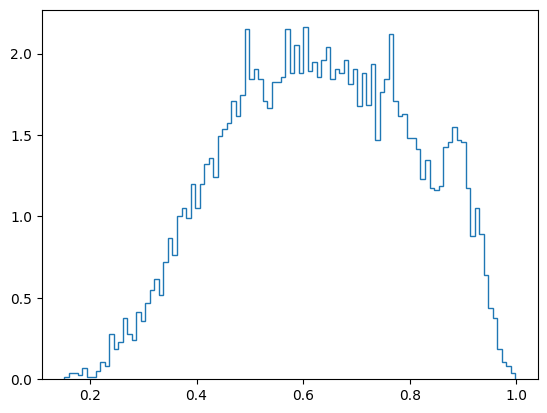

In [68]:
#plt.hist(out_kde_shifted[0] * out_kde_shifted[1], bins = 100, histtype="step", density=True)
plt.hist(np.log(out_kde[0][out_kde[1] == 1]), bins = 100, histtype="step", density=True)


(array([ 9905., 10172.,  9900.,  9917., 10133., 10005., 10076., 10030.,
         9829., 10033.]),
 array([3.65051872e-06, 1.00002687e-01, 2.00001723e-01, 3.00000759e-01,
        3.99999796e-01, 4.99998832e-01, 5.99997868e-01, 6.99996904e-01,
        7.99995941e-01, 8.99994977e-01, 9.99994013e-01]),
 <BarContainer object of 10 artists>)

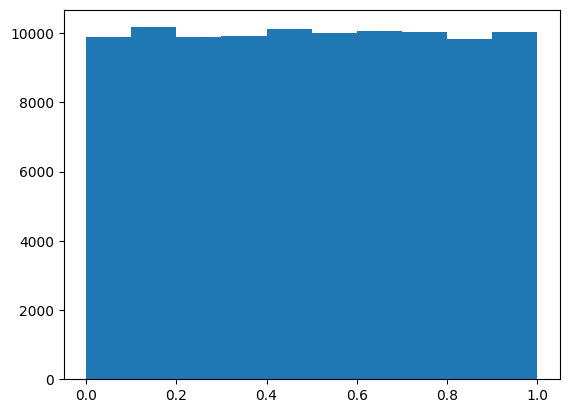

In [72]:
plt.hist(np.exp(np.log(np.random.uniform(size = 100000))))

(-10.0, 10.0)

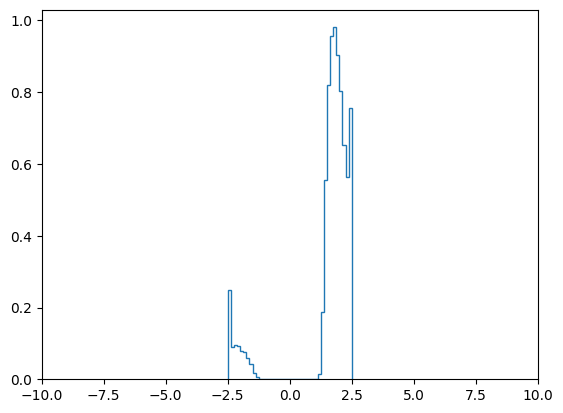

In [18]:
plt.hist(out["rts"][out["rts"] != -999] * out["choices"][out["rts"] != -999], bins=40, histtype="step", density=True)
plt.xlim(-10, 10)

In [37]:
out["choices"][out["rts"] != -999].shape

(48,)

In [20]:
from time import time

start = time()
out_traj = simulator(
    model="ddm_mic2_multinoise_no_bias", theta=[1.0, 1.0, 1.0, 1.5, 0.5, 1.0], n_samples=100000, max_t=20
)

end = time()

print(end - start)

5.748783111572266


In [46]:
out_traj["rts"]

array([[4.685915 ],
       [8.714623 ],
       [4.737911 ],
       ...,
       [2.306005 ],
       [2.5050144],
       [4.278945 ]], dtype=float32)

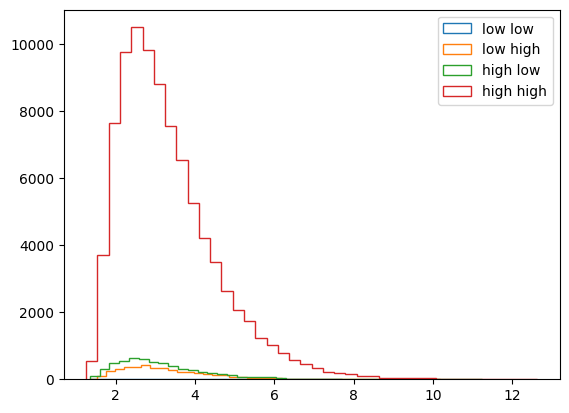

In [21]:
plt.hist(
    out_traj["rts"][(out_traj["choices"] == 0) & (out_traj["rts"] != -999)], histtype="step", bins=40, label="low low"
)
plt.hist(
    out_traj["rts"][(out_traj["choices"] == 1) & (out_traj["rts"] != -999)], histtype="step", bins=40, label="low high"
)
plt.hist(
    out_traj["rts"][(out_traj["choices"] == 2) & (out_traj["rts"] != -999)], histtype="step", bins=40, label="high low"
)
plt.hist(
    out_traj["rts"][(out_traj["choices"] == 3) & (out_traj["rts"] != -999)], histtype="step", bins=40, label="high high"
)
plt.legend()

In [22]:
out_traj["metadata"]["trajectory"]
my_traj = out_traj["metadata"]["trajectory"]

In [34]:
my_traj

array([[ 0.0000000e+00, -9.9900000e+02, -9.9900000e+02],
       [ 9.0455776e-03,  2.4773862e-04,  2.5226141e-04],
       [-5.6977585e-02,  5.1161140e-04,  4.8763864e-04],
       ...,
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02],
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02]], dtype=float32)

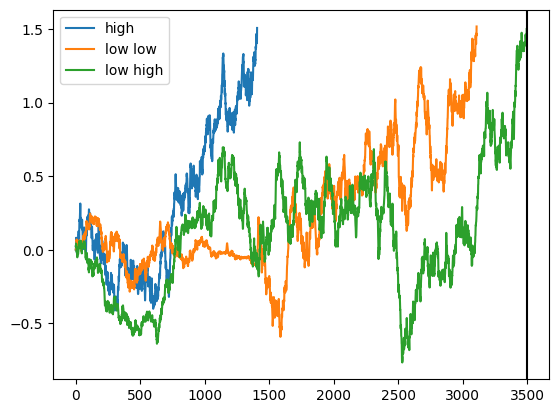

In [23]:
plt.plot(my_traj[my_traj[:, 0] != -999, 0], label="high")
plt.plot(my_traj[my_traj[:, 1] != -999, 1], label="low low")
plt.plot(my_traj[my_traj[:, 2] != -999, 2], label="low high")
plt.axvline(out_traj["rts"][0] * 1000 - 1000, color="black")
plt.legend()

In [65]:
start = time()
out = simulator(model="ddm_seq2", theta=[2.0, 0.0, 0.0, 1.0, 0.5, 0.5, 0.5, 1.0], n_samples=10000, max_t=20)

end = time()

print(end - start)

Setting mock deadline to 999 (this should never have an effect)
0.2257390022277832


(array([ 34., 241., 451., 540., 559., 537., 438., 396., 348., 294., 239.,
        168., 142., 105.,  88.,  66.,  61.,  40.,  30.,  30.,  25.,  21.,
         20.,   7.,   8.,   7.,   8.,   3.,   6.,   2.,   2.,   1.,   1.,
          1.,   0.,   4.,   2.,   1.,   0.,   2.]),
 array([1.1659404 , 1.35083079, 1.53572118, 1.72061169, 1.90550208,
        2.09039235, 2.27528286, 2.46017337, 2.64506364, 2.82995415,
        3.01484442, 3.19973493, 3.38462543, 3.56951571, 3.75440621,
        3.93929648, 4.12418699, 4.30907726, 4.49396801, 4.67885828,
        4.86374855, 5.04863882, 5.23352957, 5.41841984, 5.60331011,
        5.78820086, 5.97309113, 6.1579814 , 6.34287167, 6.52776241,
        6.71265268, 6.89754295, 7.0824337 , 7.26732397, 7.45221424,
        7.63710499, 7.82199526, 8.00688553, 8.19177628, 8.37666607,
        8.56155682]),
 [<matplotlib.patches.Polygon at 0x2a41af130>])

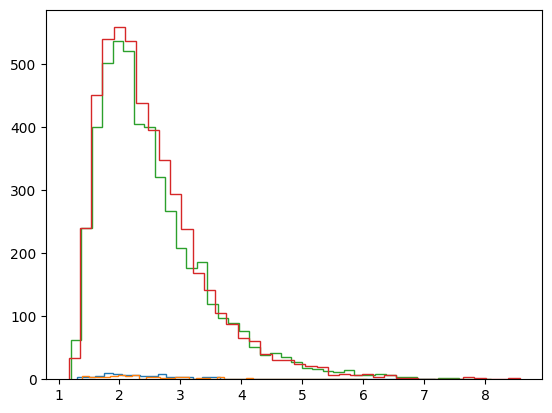

In [66]:
plt.hist(out["rts"][out["choices"] == 0], histtype="step", bins=40)
plt.hist(out["rts"][out["choices"] == 1], histtype="step", bins=40)
plt.hist(out["rts"][out["choices"] == 2], histtype="step", bins=40)
plt.hist(out["rts"][out["choices"] == 3], histtype="step", bins=40)

In [73]:
out_traj["metadata"]["trajectory"]
my_traj = out_traj["metadata"]["trajectory"]

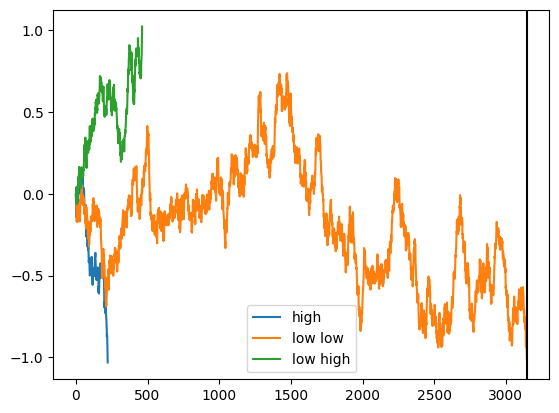

In [74]:
plt.plot(my_traj[my_traj[:, 0] != -999, 0], label="high")
plt.plot(my_traj[my_traj[:, 1] != -999, 1], label="low low")
plt.plot(my_traj[my_traj[:, 2] != -999, 2], label="low high")
plt.axvline(out_traj["rts"][0] * 1000 - 1000, color="black")
plt.legend()

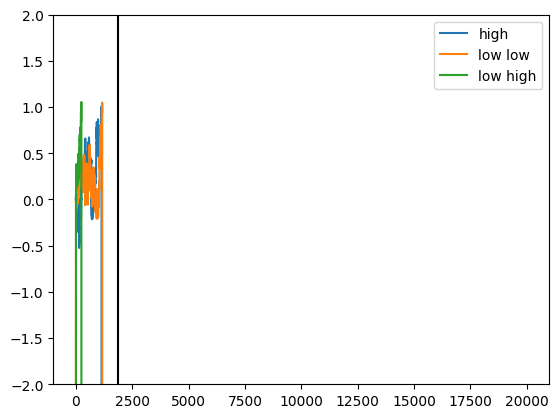

In [70]:
plt.plot(my_traj[:, 0], label="high")
plt.plot(my_traj[:, 1], label="low low")
plt.plot(my_traj[:, 2], label="low high")
plt.axvline(out_traj["rts"][0] * 1000, color="black")
plt.ylim(-2, 2)
plt.legend()

In [63]:
out_traj["rts"]

array([[2.1367593],
       [1.6214037],
       [1.8687861],
       ...,
       [2.0880182],
       [3.538052 ],
       [1.8469286]], dtype=float32)

In [17]:
deadline = np.random.normal(size=(1, 10, 1)) + 1

In [23]:
(out["rts"] > deadline)[0, :, 0]

array([False,  True, False,  True, False, False,  True,  True, False,
       False])

In [20]:
out["rts"][0, :, 0]

array([0.87634164, 5.507736  , 0.845617  , 1.7188146 , 0.94347364,
       0.637682  , 4.503843  , 0.8925978 , 0.8825737 , 1.8784422 ],
      dtype=float32)

In [22]:
deadline[0, :, 0]

array([ 1.64641569,  1.53128978,  1.27339451,  0.84860328,  0.98402066,
        2.64141251,  1.62948034, -0.76025468,  0.88753595,  3.33240167])

In [27]:
np.ones((10, 10))[:, 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
np.tile(1, (10, 1)).shape

(10, 1)